In [199]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import mean_squared_error

In [200]:
df = pd.read_csv('Tesla.csv', index_col='Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


1. Date - Date of trade
2. Open - price from the first transaction of trading day
3. High - Maximum price in a trading day
4. Low - Minimum price in a trading day
5. Close - price from the last transaction of trading day
6. Adj Close - Closing price adjusted to reflect the value after accounting for any corporate actions
7. Volume - No. of units traded in a day

In [201]:
df.shape

(2956, 6)

In [202]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [203]:
df.duplicated().sum()

0

In [204]:
col = ['Open', 'High', 'Low', 'Close', 'Adj Close']

def round_up(col):
    for j in col:
        df[j] = round(df[j], 2)

In [205]:
round_up(col)

In [206]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,3.80,5.00,3.51,4.78,4.78,93831500
2010-06-30,5.16,6.08,4.66,4.77,4.77,85935500
2010-07-01,5.00,5.18,4.05,4.39,4.39,41094000
2010-07-02,4.60,4.62,3.74,3.84,3.84,25699000
2010-07-06,4.00,4.00,3.17,3.22,3.22,34334500


In [207]:
# df['diff'] = df.Close - df['Adj Close'] 
# df['diff'].value_counts()

Since, all the values of "Close" and "Adj Close" columns are same, we can drop one of the two columns, since both are signifying the same thing. We drop the "Adj Close" column.

In [208]:
# df.drop(columns=['diff', 'Adj Close'], inplace=True)
# df.head()

In [209]:
# df.tail(5)

In [210]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

### EDA


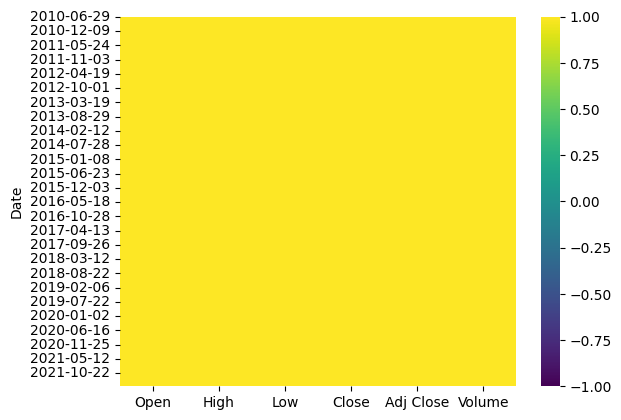

In [211]:
import seaborn as sns
sns.heatmap(df, 
            vmin=-1, 
            vmax=1, 
            cmap='viridis', 
            linecolor='red')

plt.show()

The Heatmap is clearly showing that all values depend fully on each other, i.e. if we compute for one series it will automatically fit for the rest.

In [212]:
data = df[['Close']]

In [213]:
data

,Close
Date,
2010-06-29,4.78
2010-06-30,4.77
2010-07-01,4.39
2010-07-02,3.84
2010-07-06,3.22
...,...
2022-03-18,905.39
2022-03-21,921.16
2022-03-22,993.98


In [214]:
scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(data)

In [215]:
train_size = int(0.8 * len(scaled_data))
test_size = len(scaled_data) - train_size
print(f"Train Size: {train_size} \nTest Size: {test_size}")

Train Size: 2364 
Test Size: 592


In [216]:
df1 = pd.DataFrame(scaled_data)

In [217]:
train = df1.values[:train_size, :]
test = df1.values[train_size-60:, :]

In [218]:
train.shape

(2364, 1)

In [219]:
X_train = []
y_train = []

for i in range(60, len(train)):
    X_train.append(train[i-60:i, :])
    y_train.append(train[i, :])

In [220]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [221]:
X_train.shape

(2304, 60, 1)

In [222]:
y_train.shape

(2304, 1)

In [223]:
X_train.shape

(2304, 60, 1)

In [224]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(2304, 60, 1)

In [225]:
model = Sequential([
    LSTM(50,return_sequences= True, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(64, return_sequences= False),
    Dense(16, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')
])

model.compile(optimizer= 'adam', loss= 'mse')

c:\Users\Ayush R\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [226]:
callbacks = [EarlyStopping(monitor= 'loss', patience= 10 , restore_best_weights= True)]

history = model.fit(X_train, y_train, epochs= 50, batch_size= 16, callbacks=callbacks)

Epoch 1/50


144/144 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 2.0823e-04
Epoch 2/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 8.9742e-06
Epoch 3/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.0177e-05
Epoch 4/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 6.6735e-06
Epoch 5/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 6.2443e-06
Epoch 6/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 8.0271e-06
Epoch 7/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 4.7269e-06
Epoch 8/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 5.9795e-06
Epoch 9/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 5.0627e-06
Epoch 10/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 6.9655e-06
Epoch 11/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 4.5401e-06
Epoch 12/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 4.4369e-06
Epoch 13/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 5.0721e-06
Epoch 14/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 3.5743e-0

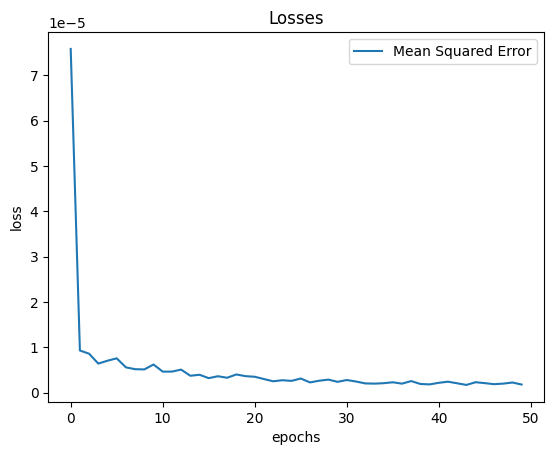

In [227]:
plt.plot(history.history["loss"])
plt.legend(['Mean Squared Error'])
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [228]:
x_test = []
y_test = []

for i in range(60, len(test)):
    x_test.append(test[i-60:i, 0])
    y_test.append(test[i, 0])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [229]:
predictions = model.predict(x_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


In [230]:
predictions = scaler.inverse_transform(predictions)
predictions.shape

(592, 1)

In [231]:
y_test = scaler.inverse_transform([y_test])

In [232]:
RMSE = np.sqrt(np.mean( y_test - predictions )**2).round(2)
RMSE

196.63

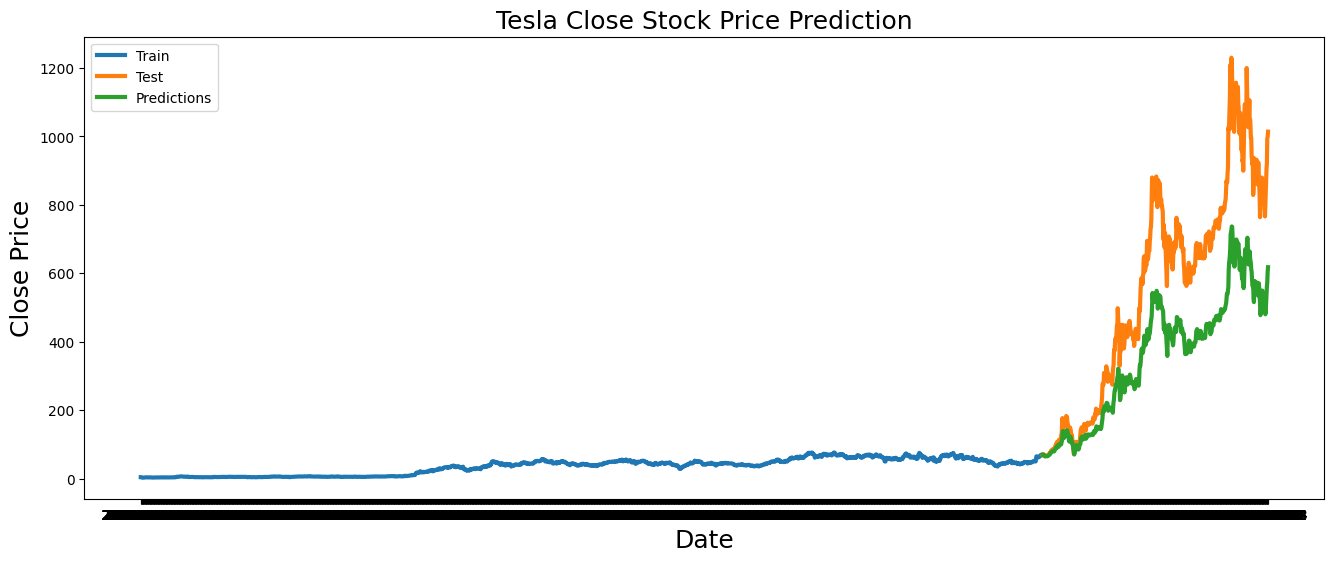

In [233]:
train = data.iloc[:train_size , 0:1]
test = data.iloc[train_size: , 0:1]
test['Predictions'] = predictions

plt.figure(figsize= (16, 6))
plt.title('Tesla Close Stock Price Prediction', fontsize= 18)
plt.xlabel('Date', fontsize= 18)
plt.ylabel('Close Price', fontsize= 18)
plt.plot(train['Close'], linewidth= 3)
plt.plot(test['Close'], linewidth= 3)
plt.plot(test["Predictions"], linewidth= 3)
plt.legend(['Train', 'Test', 'Predictions'])